In [22]:
import pandas as pd
import numpy as np
import re
import itertools
import csv
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

pd.set_option('display.max_columns', 500)

train = pd.read_csv("train_2021.csv", dtype={"zip_code" : object})
test = pd.read_csv("test_2021.csv", dtype={"zip_code" : object})
# train_data = pd.read_csv("../data/raw_train_data.csv", dtype={"zip_code" : object})
# test_data = pd.read_csv("../data/raw_test_data.csv", dtype={"zip_code" : object})

In [2]:
train.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156462
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363303
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,0.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


In [3]:
test.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight
count,12002.000000,12002.000000,12000.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,11914.000000,12002.000000,12002.000000,11988.000000,11999.000000,12002.000000,12002.000000
mean,15045.335111,43.525162,0.715167,73.702966,37331.504833,0.698134,0.576737,0.494918,0.238711,49.770122,0.601066,5016.502211,4.969331,22925.335594,22860.701764
std,8661.251912,12.201298,0.451354,15.378967,2926.069309,0.459087,0.494097,0.956002,0.426313,33.581191,0.489699,2257.041870,2.227267,12108.888412,12198.142508
min,2.000000,19.000000,0.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,471.363743,0.000000,2261.507903,2583.428985
25%,7532.250000,35.000000,0.000000,66.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,3367.182392,3.000000,14087.559950,13832.434587
50%,15055.500000,43.000000,1.000000,76.000000,37606.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,4673.058955,5.000000,20642.029325,20508.293695
75%,22559.500000,51.000000,1.000000,85.000000,39313.000000,1.000000,1.000000,1.000000,0.000000,82.000000,1.000000,6295.292309,6.000000,29293.641235,29205.553660
max,29998.000000,278.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,14.000000,106991.684500,101818.964200


It could be seen from the dataset summary that **age_of_driver** has values larger than 100, **annual_income** has a value of -1, and **fraud** has values that are -1. These values should be set as missing values.

In [3]:
train.isnull().sum()

claim_number                0
age_of_driver               0
gender                      0
marital_status              2
safty_rating                0
annual_income               0
high_education_ind          0
address_change_ind          0
living_status               0
zip_code                    0
claim_date                  0
claim_day_of_week           0
accident_site               0
past_num_of_claims          0
witness_present_ind        88
liab_prct                   0
channel                     0
policy_report_filed_ind     0
claim_est_payout           14
age_of_vehicle              3
vehicle_category            0
vehicle_price               0
vehicle_color               0
vehicle_weight              0
dtype: int64

From the summary above, the dataset also has some missing values in  
**marital_stats,witness_present_ind,claim_est_payout,age_of_vehivle**

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

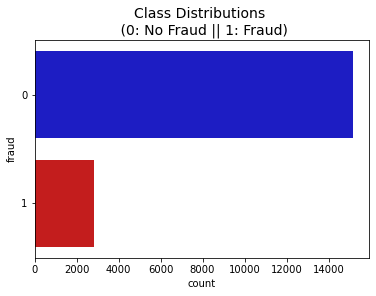

In [3]:
import matplotlib.pyplot as plt
colors = ["#0101DF", "#DF0101"]
sns.countplot(y='fraud', data=train, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [18]:
## fraud
train = train[train.fraud != -1]

## annual_income
train.loc[train.annual_income==-1, 'annual_income'] = np.nan
test.loc[test.annual_income==-1, 'annual_income'] = np.nan

## age_of_driver
train.loc[train.age_of_driver>100, 'age_of_driver'] = np.nan
test.loc[test.age_of_driver>100, 'age_of_driver'] = np.nan

## Encode Categorical Variables

In [19]:
# set claim_number as index:
train = train.set_index('claim_number')
test = test.set_index('claim_number')


In [20]:
train["marital_status"] = pd.Categorical(train["marital_status"])
train["high_education_ind"] = pd.Categorical(train["high_education_ind"])
train["address_change_ind"] = pd.Categorical(train["address_change_ind"])
train["zip_code"] = pd.Categorical(train["zip_code"])
train["witness_present_ind"] = pd.Categorical(train["witness_present_ind"])
train["policy_report_filed_ind"] = pd.Categorical(train["policy_report_filed_ind"])
train["fraud"] = pd.Categorical(train["fraud"])

test["marital_status"] = pd.Categorical(test["marital_status"])
test["high_education_ind"] = pd.Categorical(test["high_education_ind"])
test["address_change_ind"] = pd.Categorical(test["address_change_ind"])
test["zip_code"] = pd.Categorical(test["zip_code"])
test["witness_present_ind"] = pd.Categorical(test["witness_present_ind"])
test["policy_report_filed_ind"] = pd.Categorical(test["policy_report_filed_ind"])

In [21]:
month_dict = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}
### On the train data
train["claim_month"] = train['claim_date'].apply(
    lambda x: month_dict[int(re.search("^(\d+)/", x).group(1))])
train["claim_day"] = train['claim_date'].apply(
    lambda x: int(re.search("/(\d+)/", x).group(1)))
train["claim_year"] = train['claim_date'].apply(
    lambda x: int(re.search("/(\d+)$", x).group(1)))


### On the test data
test["claim_month"] = test['claim_date'].apply(
    lambda x: month_dict[int(re.search("^(\d+)/", x).group(1))])
test["claim_day"] = test['claim_date'].apply(
    lambda x: int(re.search("/(\d+)/", x).group(1)))
test["claim_year"] = test['claim_date'].apply(
    lambda x: int(re.search("/(\d+)$", x).group(1)))

## Add new features: Lat/Lon/State

In [22]:
with open("zip_code_database.csv", newline='') as csvfile:
    csv_reader = csv.DictReader(csvfile, delimiter=',')
    zip_to_lat = {}
    zip_to_lon = {}
    zip_to_state = {}
    for zip_data in csv_reader:
        zip_to_lat[zip_data['zip']] = float(zip_data['latitude'])
        zip_to_lon[zip_data['zip']] = float(zip_data['longitude'])
        zip_to_state[zip_data['zip']] = zip_data['state']
        
### assuming the '0' zip code is NaN (no such thing as a zip code of 0)   
zip_to_lat[np.nan] = np.nan
zip_to_lon[np.nan] = np.nan
zip_to_state[np.nan] = np.nan

zip_to_lat['0'] = np.nan
zip_to_lon['0'] = np.nan
zip_to_state['0'] = np.nan

### transform zip code to latitude, longitude, and state
latitude_train = train['zip_code'].apply(
    lambda x: zip_to_lat[x]
)
longitude_train = train['zip_code'].apply(
    lambda x: zip_to_lon[x]
)
state_train = train['zip_code'].apply(
    lambda x: zip_to_state[x]
)
latitude_train.name = 'latitude'
longitude_train.name = 'longitude'
state_train.name = 'state'

latitude_test = test['zip_code'].apply(
    lambda x: zip_to_lat[x]
)
longitude_test = test['zip_code'].apply(
    lambda x: zip_to_lon[x]
)
state_test = test['zip_code'].apply(
    lambda x: zip_to_state[x]
)
latitude_test.name = 'latitude'
longitude_test.name = 'longitude'
state_test.name = 'state'


### Add these new features to the data frame
train = pd.concat([train, latitude_train], axis=1)
train = pd.concat([train, longitude_train], axis=1)
train = pd.concat([train, state_train], axis=1)
train["state"] = pd.Categorical(train["state"])

test = pd.concat([test, latitude_test], axis=1)
test = pd.concat([test, longitude_test], axis=1)
test = pd.concat([test, state_test], axis=1)
test["state"] = pd.Categorical(test["state"])

## Imputation of Missing Values 
(Use mode and mean to impute)

In [23]:
# mean of age_of_driver
age_of_driver_mean = train.age_of_driver.mean()
train['age_of_driver'].fillna(age_of_driver_mean, inplace=True)
test['age_of_driver'].fillna(age_of_driver_mean, inplace=True)

# mode of marital_status
marital_status_mode = train.marital_status.mode().values[0]
train['marital_status'].fillna(marital_status_mode, inplace=True)
test['marital_status'].fillna(marital_status_mode, inplace=True)

# average of annual_income
annual_income_mean = train.annual_income.mean()
train['annual_income'].fillna(annual_income_mean, inplace=True)
test['annual_income'].fillna(annual_income_mean, inplace=True)

# mode of witness_present_ind
witness_present_mode = train.witness_present_ind.mode().values[0]
train['witness_present_ind'].fillna(witness_present_mode, inplace=True)
test['witness_present_ind'].fillna(witness_present_mode, inplace=True)

# mean of claim_est_payout
claim_est_payout_mean = train.claim_est_payout.mean()
train['claim_est_payout'].fillna(claim_est_payout_mean, inplace=True)
test['claim_est_payout'].fillna(claim_est_payout_mean, inplace=True)

# mean of age_of_vehicle
age_of_vehicle_mean = train.age_of_vehicle.mean()
train['age_of_vehicle'].fillna(age_of_vehicle_mean, inplace=True)
test['age_of_vehicle'].fillna(age_of_vehicle_mean, inplace=True)

# mean latitude
latitude_mean = train.latitude.mean()
train['latitude'].fillna(latitude_mean, inplace=True)
test['latitude'].fillna(latitude_mean, inplace=True)

# mean longitude
longitude_mean = train.longitude.mean()
train['longitude'].fillna(longitude_mean, inplace=True)
test['longitude'].fillna(longitude_mean, inplace=True)

# mode of state
state_mode = train.state.mode().values[0]
train['state'].fillna(state_mode, inplace=True)
test['state'].fillna(state_mode, inplace=True)

# # print the list of missing columns
# print(list(itertools.compress(list(train), list(train.isna().any()))))
# print(list(itertools.compress(list(test), list(test.isna().any()))))

## One-Hot Encoding of Categorical Variables

Encode categorical variables that have more than two categories using one hot encoding.  
Check that the same number of categories exist in both the training and testing data sets.

In [24]:
###encoding for TRAIN data set

# one-hot encoding for day of week
day_dummies = pd.get_dummies(train['claim_day_of_week'], 
                             prefix='claim_day', drop_first=True)
train = pd.concat([train, day_dummies], axis=1)
train.drop(["claim_day_of_week"], axis=1, inplace=True)

# one-hot encoding for site of accident
accident_dummies = pd.get_dummies(train['accident_site'], 
                                  prefix='accident_site', drop_first=True)
train = pd.concat([train, accident_dummies], axis=1)
train.drop(["accident_site"], axis=1, inplace=True)

# one-hot encoding for channel
channel_dummies = pd.get_dummies(train['channel'], 
                                 prefix='channel', drop_first=True)
train = pd.concat([train, channel_dummies], axis=1)
train.drop(["channel"], axis=1, inplace=True)

# one-hot encoding for vehicle category
vehicle_cat_dummies = pd.get_dummies(train['vehicle_category'], 
                                 prefix='vehicle_category', drop_first=True)
train = pd.concat([train, vehicle_cat_dummies], axis=1)
train.drop(["vehicle_category"], axis=1, inplace=True)

# one-hot encoding for vehicle color
vehicle_color_dummies = pd.get_dummies(train['vehicle_color'], 
                                 prefix='vehicle_color', drop_first=True)
train = pd.concat([train, vehicle_color_dummies], axis=1)
train.drop(["vehicle_color"], axis=1, inplace=True)

# one-hot encoding for claim month
vehicle_color_dummies = pd.get_dummies(train['claim_month'], 
                                 prefix='claim_month', drop_first=True)
train = pd.concat([train, vehicle_color_dummies], axis=1)
train.drop(["claim_month"], axis=1, inplace=True)

# one-hot encoding for state
state_dummies = pd.get_dummies(train['state'],
                               prefix='state', drop_first=True)
train = pd.concat([train, state_dummies], axis=1)
train.drop(["state"], axis=1, inplace=True)



### encoding for TEST data set

# one-hot encoding for day of week
day_dummies = pd.get_dummies(test['claim_day_of_week'], 
                             prefix='claim_day', drop_first=True)
test = pd.concat([test, day_dummies], axis=1)
test.drop(["claim_day_of_week"], axis=1, inplace=True)

# one-hot encoding for site of accident
accident_dummies = pd.get_dummies(test['accident_site'], 
                                  prefix='accident_site', drop_first=True)
test = pd.concat([test, accident_dummies], axis=1)
test.drop(["accident_site"], axis=1, inplace=True)

# one-hot encoding for channel
channel_dummies = pd.get_dummies(test['channel'], 
                                 prefix='channel', drop_first=True)
test = pd.concat([test, channel_dummies], axis=1)
test.drop(["channel"], axis=1, inplace=True)

# one-hot encoding for vehicle category
vehicle_cat_dummies = pd.get_dummies(test['vehicle_category'], 
                                 prefix='vehicle_category', drop_first=True)
test = pd.concat([test, vehicle_cat_dummies], axis=1)
test.drop(["vehicle_category"], axis=1, inplace=True)

# one-hot encoding for vehicle color
vehicle_color_dummies = pd.get_dummies(test['vehicle_color'], 
                                 prefix='vehicle_color', drop_first=True)
test = pd.concat([test, vehicle_color_dummies], axis=1)
test.drop(["vehicle_color"], axis=1, inplace=True)

# one-hot encoding for claim month
vehicle_color_dummies = pd.get_dummies(test['claim_month'], 
                                 prefix='claim_month', drop_first=True)
test = pd.concat([test, vehicle_color_dummies], axis=1)
test.drop(["claim_month"], axis=1, inplace=True)

# one-hot encoding for state
state_dummies = pd.get_dummies(test['state'],
                               prefix='state', drop_first=True)
test = pd.concat([test, state_dummies], axis=1)
test.drop(["state"], axis=1, inplace=True)

In [25]:
### clean up variable names by making them all lowercase with underscore separators.
train.columns = map(
    lambda s: s.lower().replace(' ', '_'), 
    train.columns)

test.columns = map(
    lambda s: s.lower().replace(' ', '_'), 
    test.columns)

In [11]:
train.describe()

,age_of_driver,safty_rating,annual_income,past_num_of_claims,liab_prct,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,claim_day,claim_year,latitude,longitude,claim_day_monday,claim_day_saturday,claim_day_sunday,claim_day_thursday,claim_day_tuesday,claim_day_wednesday,accident_site_local,accident_site_parking_lot,channel_online,channel_phone,vehicle_category_large,vehicle_category_medium,vehicle_color_blue,vehicle_color_gray,vehicle_color_other,vehicle_color_red,vehicle_color_silver,vehicle_color_white,claim_month_august,claim_month_december,claim_month_february,claim_month_january,claim_month_july,claim_month_june,claim_month_march,claim_month_may,claim_month_november,claim_month_october,claim_month_september,state_co,state_ia,state_pa,state_va
count,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000
mean,43.667667,73.562951,37398.825669,0.505001,49.423269,4975.792083,5.008060,23089.123114,23031.322385,15.734582,2015.493722,38.847519,-93.640355,0.142794,0.146127,0.146072,0.142849,0.140571,0.139682,0.487165,0.304034,0.144127,0.320647,0.332593,0.330537,0.141571,0.141460,0.139738,0.142516,0.145516,0.143627,0.090454,0.081565,0.079175,0.087732,0.085621,0.080842,0.087954,0.084787,0.080064,0.081342,0.081342,0.195855,0.198355,0.200522,0.201689
std,11.792412,15.346807,2753.318338,0.955504,33.678470,2214.659783,2.257889,11988.429767,12052.385584,8.810833,0.499974,2.852722,13.508422,0.349872,0.353244,0.353188,0.349929,0.347588,0.346667,0.499849,0.460010,0.351228,0.466738,0.471155,0.470419,0.348620,0.348505,0.346724,0.349588,0.352630,0.350721,0.286840,0.273708,0.270020,0.282913,0.279811,0.272600,0.283236,0.278573,0.271400,0.273368,0.273368,0.396869,0.398772,0.400402,0.401272
min,18.000000,1.000000,28896.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,1.000000,2015.000000,33.300000,-112.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,65.000000,35555.000000,0.000000,17.000000,3339.205052,3.000000,14279.574850,14164.122133,8.000000,2015.000000,38.810000,-105.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,76.000000,37610.000000,0.000000,50.000000,4671.827763,5.000000,20948.879250,20838.150260,16.000000,2015.000000,39.770000,-93.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,85.000000,39318.000000,1.000000,81.000000,6254.708103,6.000000,29562.232780,29430.446293,23.000000,2016.000000,40.610000,-79.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [26]:
train.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud,claim_day,claim_year,latitude,longitude,claim_day_monday,claim_day_saturday,claim_day_sunday,claim_day_thursday,claim_day_tuesday,claim_day_wednesday,accident_site_local,accident_site_parking_lot,channel_online,channel_phone,vehicle_category_large,vehicle_category_medium,vehicle_color_blue,vehicle_color_gray,vehicle_color_other,vehicle_color_red,vehicle_color_silver,vehicle_color_white,claim_month_august,claim_month_december,claim_month_february,claim_month_january,claim_month_july,claim_month_june,claim_month_march,claim_month_may,claim_month_november,claim_month_october,claim_month_september,state_co,state_ia,state_pa,state_va
claim_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,46.0,M,1.0,85,38301.0,1,1,Rent,80006,12/16/2016,1,0.0,74,0,7530.940993,9.0,12885.45235,16161.33381,0,16,2016,39.82,-105.10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,21.0,F,0.0,75,30445.0,0,1,Rent,15021,2/12/2015,1,1.0,79,0,2966.024895,4.0,29429.45218,28691.96422,0,12,2015,40.38,-80.39,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,49.0,F,0.0,87,38923.0,0,1,Own,20158,12/6/2016,0,0.0,0,0,6283.888333,3.0,21701.18195,22090.94758,1,6,2016,39.13,-77.66,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,58.0,F,1.0,58,40605.0,1,0,Own,15024,5/5/2016,3,0.0,99,1,6169.747994,4.0,13198.27344,38329.58106,1,5,2016,40.54,-79.80,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6,38.0,M,1.0,95,36380.0,1,0,Rent,50034,10/27/2015,0,1.0,7,0,4541.387150,7.0,38060.21122,25876.56319,0,27,2015,42.47,-93.64,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [24]:
train.to_csv('encoded_train.csv',header=True)
test.to_csv('encoded_test.csv',header=True)

## add grouped-by means as the new features

In [27]:
#  Encode gender and living status and state  #
train["living_status"] = pd.Categorical(train["living_status"])
train["gender"] = np.where(train["gender"].str.contains("M"), 1, 0)
train["living_status"] = np.where(train["living_status"].str.contains("Rent"), 1, 0)

test["living_status"] = pd.Categorical(test["living_status"])
test["gender"] = np.where(test["gender"].str.contains("M"), 1, 0)
test["living_status"] = np.where(test["living_status"].str.contains("Rent"), 1, 0)


In [ ]:
# train.info()

In [ ]:
# ## gender
# grouped_gender = train["fraud"].groupby(train['gender'])
# grouped_gender.to_numeric(errors='coerce')
# grouped_gender_mean = grouped_gender.mean().to_frame()
# grouped_gender_mean['gender']=grouped_gender_mean.index
# grouped_gender_mean['fraud_gender'] = grouped_gender_mean['fraud']
# grouped_gender_mean.drop('fraud', axis = 1, inplace = True)
# grouped_gender_mean=grouped_gender_mean.drop(['gender'],axis=1)
# train = pd.merge(train, grouped_gender_mean, on = "gender", how = "left")
# test = pd.merge(test, grouped_gender_mean, on = "gender", how = "left")
# grouped_gender_mean



In [ ]:
# ## marital_status
# grouped_marital_status = train["fraud"].groupby(train['marital_status'])
# grouped_marital_status_mean = grouped_marital_status.mean().to_frame()
# grouped_marital_status_mean['marital_status']=grouped_marital_status_mean.index
# grouped_marital_status_mean['fraud_marital_status'] = grouped_marital_status_mean['fraud']
# grouped_marital_status_mean.drop('fraud', axis = 1, inplace = True)
# grouped_marital_status_mean=grouped_marital_status_mean.drop(['marital_status'],axis=1)
# train = pd.merge(train, grouped_marital_status_mean, on = "marital_status", how = "left")
# test = pd.merge(test, grouped_marital_status_mean, on = "marital_status", how = "left")
# grouped_marital_status_mean

# ## high_education_ind
# grouped_high_education_ind = train["fraud"].groupby(train['high_education_ind'])
# grouped_high_education_ind_mean = grouped_high_education_ind.mean().to_frame()
# grouped_high_education_ind_mean['high_education_ind']=grouped_high_education_ind_mean.index
# grouped_high_education_ind_mean['fraud_high_education_ind'] = grouped_high_education_ind_mean['fraud']
# grouped_high_education_ind_mean.drop('fraud', axis = 1, inplace = True)
# grouped_high_education_ind_mean=grouped_high_education_ind_mean.drop(['high_education_ind'],axis=1)
# train = pd.merge(train, grouped_high_education_ind_mean, on = "high_education_ind", how = "left")
# test = pd.merge(test, grouped_high_education_ind_mean, on = "high_education_ind", how = "left")
# grouped_high_education_ind_mean


# ## address_change_ind
# grouped_address_change_ind = train["fraud"].groupby(train['address_change_ind'])
# grouped_address_change_ind_mean = grouped_address_change_ind.mean().to_frame()
# grouped_address_change_ind_mean['address_change_ind']=grouped_address_change_ind_mean.index
# grouped_address_change_ind_mean['fraud_address_change_ind'] = grouped_address_change_ind_mean['fraud']
# grouped_address_change_ind_mean.drop('fraud', axis = 1, inplace = True)
# grouped_address_change_ind_mean=grouped_address_change_ind_mean.drop(['address_change_ind'],axis=1)
# train = pd.merge(train, grouped_address_change_ind_mean, on = "address_change_ind", how = "left")
# test = pd.merge(test, grouped_address_change_ind_mean, on = "address_change_ind", how = "left")
# grouped_address_change_ind_mean

# ## living_status
# grouped_living_status = train["fraud"].groupby(train['living_status'])
# grouped_living_status_mean = grouped_living_status.mean().to_frame()
# grouped_living_status_mean['living_status']=grouped_living_status_mean.index
# grouped_living_status_mean['fraud_living_status'] = grouped_living_status_mean['fraud']
# grouped_living_status_mean.drop('fraud', axis = 1, inplace = True)
# grouped_living_status_mean=grouped_living_status_mean.drop(['living_status'],axis=1)
# train = pd.merge(train, grouped_living_status_mean, on = "living_status", how = "left")
# test = pd.merge(test, grouped_living_status_mean, on = "living_status", how = "left")
# grouped_living_status_mean

# ## zip_code
# grouped_zip_code = train["fraud"].groupby(train['zip_code'])
# grouped_zip_code_mean = grouped_zip_code.mean().to_frame()
# grouped_zip_code_mean['zip_code']=grouped_zip_code_mean.index
# grouped_zip_code_mean['fraud_zip_code'] = grouped_zip_code_mean['fraud']
# grouped_zip_code_mean.drop('fraud', axis = 1, inplace = True)
# grouped_zip_code_mean=grouped_zip_code_mean.drop(['zip_code'],axis=1)
# train = pd.merge(train, grouped_zip_code_mean, on = "zip_code", how = "left")
# test = pd.merge(test, grouped_zip_code_mean, on = "zip_code", how = "left")
# grouped_zip_code_mean

# ## claim_date
# grouped_claim_date = train["fraud"].groupby(train['claim_date'])
# grouped_claim_date_mean = grouped_claim_date.mean().to_frame()
# grouped_claim_date_mean['claim_date']=grouped_claim_date_mean.index
# grouped_claim_date_mean['fraud_claim_date'] = grouped_claim_date_mean['fraud']
# grouped_claim_date_mean.drop('fraud', axis = 1, inplace = True)
# grouped_claim_date_mean=grouped_claim_date_mean.drop(['claim_date'],axis=1)
# train = pd.merge(train, grouped_claim_date_mean, on = "claim_date", how = "left")
# test = pd.merge(test, grouped_claim_date_mean, on = "claim_date", how = "left")
# grouped_claim_date_mean

# ## witness_present_ind
# grouped_witness_present_ind = train["fraud"].groupby(train['witness_present_ind'])
# grouped_witness_present_ind_mean = grouped_witness_present_ind.mean().to_frame()
# grouped_witness_present_ind_mean['witness_present_ind']=grouped_witness_present_ind_mean.index
# grouped_witness_present_ind_mean['fraud_witness_present_ind'] = grouped_witness_present_ind_mean['fraud']
# grouped_witness_present_ind_mean.drop('fraud', axis = 1, inplace = True)
# grouped_witness_present_ind_mean=grouped_witness_present_ind_mean.drop(['witness_present_ind'],axis=1)
# train = pd.merge(train, grouped_witness_present_ind_mean, on = "witness_present_ind", how = "left")
# test = pd.merge(test, grouped_witness_present_ind_mean, on = "witness_present_ind", how = "left")
# grouped_witness_present_ind_mean

# ## policy_report_filed_ind
# grouped_policy_report_filed_ind = train["fraud"].groupby(train['policy_report_filed_ind'])
# grouped_policy_report_filed_ind_mean = grouped_policy_report_filed_ind.mean().to_frame()
# grouped_policy_report_filed_ind_mean['policy_report_filed_ind']=grouped_policy_report_filed_ind_mean.index
# grouped_policy_report_filed_ind_mean['fraud_policy_report_filed_ind'] = grouped_policy_report_filed_ind_mean['fraud']
# grouped_policy_report_filed_ind_mean.drop('fraud', axis = 1, inplace = True)
# grouped_policy_report_filed_ind_mean=grouped_policy_report_filed_ind_mean.drop(['policy_report_filed_ind'],axis=1)
# train = pd.merge(train, grouped_policy_report_filed_ind_mean, on = "policy_report_filed_ind", how = "left")
# test = pd.merge(test, grouped_policy_report_filed_ind_mean, on = "policy_report_filed_ind", how = "left")
# grouped_policy_report_filed_ind_mean

# ## state
# grouped_state = train["fraud"].groupby(train['state'])
# grouped_state_mean = grouped_state.mean().to_frame()
# grouped_state_mean['state']=grouped_state_mean.index
# grouped_state_mean['fraud_state'] = grouped_state_mean['fraud']
# grouped_state_mean.drop('fraud', axis = 1, inplace = True)
# grouped_state_mean=grouped_state_mean.drop(['state'],axis=1)
# train = pd.merge(train, grouped_state_mean, on = "state", how = "left")
# test = pd.merge(test, grouped_state_mean, on = "state", how = "left")
# grouped_state_mean

# ## accident_site
# grouped_accident_site = raw_train["fraud"].groupby(raw_train['accident_site'])
# grouped_accident_site_mean = grouped_accident_site.mean().to_frame()
# grouped_accident_site_mean['accident_site']=grouped_accident_site_mean.index
# grouped_accident_site_mean['fraud_accident_site'] = grouped_accident_site_mean['fraud']
# grouped_accident_site_mean.drop('fraud', axis = 1, inplace = True)
# grouped_accident_site_mean=grouped_accident_site_mean.drop(['accident_site'],axis=1)
# raw_train = pd.merge(raw_train, grouped_accident_site_mean, on = "accident_site", how = "left")
# train['fraud_accident_site'] = raw_train['fraud_accident_site']
# raw_test = pd.merge(raw_test, grouped_accident_site_mean, on = "accident_site", how = "left")
# test['fraud_accident_site'] = raw_test['fraud_accident_site']
# grouped_accident_site_mean

# ## channel
# grouped_channel = raw_train["fraud"].groupby(raw_train['channel'])
# grouped_channel_mean = grouped_channel.mean().to_frame()
# grouped_channel_mean['channel']=grouped_channel_mean.index
# grouped_channel_mean['fraud_channel'] = grouped_channel_mean['fraud']
# grouped_channel_mean.drop('fraud', axis = 1, inplace = True)
# grouped_channel_mean=grouped_channel_mean.drop(['channel'],axis=1)
# raw_train = pd.merge(raw_train, grouped_channel_mean, on = "channel", how = "left")
# train['fraud_channel'] = raw_train['fraud_channel']
# raw_test = pd.merge(raw_test, grouped_channel_mean, on = "channel", how = "left")
# test['fraud_channel'] = raw_test['fraud_channel']
              
# grouped_channel_mean

# ## vehicle_category
# grouped_vehicle_category = raw_train["fraud"].groupby(raw_train['vehicle_category'])
# grouped_vehicle_category_mean = grouped_vehicle_category.mean().to_frame()
# grouped_vehicle_category_mean['vehicle_category']=grouped_vehicle_category_mean.index
# grouped_vehicle_category_mean['fraud_vehicle_category'] = grouped_vehicle_category_mean['fraud']
# grouped_vehicle_category_mean.drop('fraud', axis = 1, inplace = True)
# grouped_vehicle_category_mean=grouped_vehicle_category_mean.drop(['vehicle_category'],axis=1)
# raw_train = pd.merge(raw_train, grouped_vehicle_category_mean, on = "vehicle_category", how = "left")
# train['fraud_vehicle_category'] = raw_train['fraud_vehicle_category']
# raw_test = pd.merge(raw_test, grouped_vehicle_category_mean, on = "vehicle_category", how = "left")
# test['fraud_vehicle_category'] = raw_test['fraud_vehicle_category']              
# grouped_vehicle_category_mean

# ## vehicle_color
# grouped_vehicle_color = raw_train["fraud"].groupby(raw_train['vehicle_color'])
# grouped_vehicle_color_mean = grouped_vehicle_color.mean().to_frame()
# grouped_vehicle_color_mean['vehicle_color']=grouped_vehicle_color_mean.index
# grouped_vehicle_color_mean['fraud_vehicle_color'] = grouped_vehicle_color_mean['fraud']
# grouped_vehicle_color_mean.drop('fraud', axis = 1, inplace = True)
# grouped_vehicle_color_mean=grouped_vehicle_color_mean.drop(['vehicle_color'],axis=1)
# raw_train = pd.merge(raw_train, grouped_vehicle_color_mean, on = "vehicle_color", how = "left")
# train['fraud_vehicle_color'] = raw_train['fraud_vehicle_color']
# raw_test = pd.merge(raw_test, grouped_vehicle_color_mean, on = "vehicle_color", how = "left")
# test['fraud_vehicle_color'] = raw_test['fraud_vehicle_color']              
# grouped_vehicle_color_mean

In [6]:
# Import packages  #
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from skopt import BayesSearchCV
from matplotlib import pyplot
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score

In [37]:
train = pd.read_csv("train_data_cleaned.csv")
test = pd.read_csv("test_data_cleaned.csv")

In [39]:
#  Encode gender and living status and state  #####
train["living_status"] = pd.Categorical(train["living_status"])
train["gender"] = np.where(train["gender"].str.contains("M"), 1, 0)
train["living_status"] = np.where(train["living_status"].str.contains("Rent"), 1, 0)

test["living_status"] = pd.Categorical(test["living_status"])
test["gender"] = np.where(test["gender"].str.contains("M"), 1, 0)
test["living_status"] = np.where(test["living_status"].str.contains("Rent"), 1, 0)

In [41]:
# one-hot encoding for site of state
state_dummies = pd.get_dummies(test['state'], 
                                  prefix='state', drop_first=True)
test = pd.concat([test, state_dummies], axis=1)
test.drop(["state"], axis=1, inplace=True)

# one-hot encoding for site of state
state_dummies = pd.get_dummies(train['state'], 
                                  prefix='state', drop_first=True)
train = pd.concat([train, state_dummies], axis=1)
train.drop(["state"], axis=1, inplace=True)

In [43]:
# Drop month, day and year data, drop vehicle color, zipcode, claim_date, claim_number and SP_Index  #####
train.drop(["claim_month_january", "claim_month_february", "claim_month_march", "claim_month_may", 
              "claim_month_june", "claim_month_july", "claim_month_august", "claim_month_september", 
              "claim_month_october", "claim_month_november", "claim_month_december", 
              "claim_day_monday", "claim_day_tuesday", "claim_day_wednesday", "claim_day_thursday", 
               "claim_day_saturday", "claim_day_sunday", "claim_year", "claim_day", 
              "zip_code", "claim_date", "claim_number",  "vehicle_color_blue", 
               "vehicle_color_gray", "vehicle_color_other", "vehicle_color_red", 
              "vehicle_color_silver", "vehicle_color_white"], axis =1, inplace=True)

test.drop(["claim_month_january", "claim_month_february", "claim_month_march", "claim_month_may", 
              "claim_month_june", "claim_month_july", "claim_month_august", "claim_month_september", 
              "claim_month_october", "claim_month_november", "claim_month_december", 
              "claim_day_monday", "claim_day_tuesday", "claim_day_wednesday", "claim_day_thursday", 
               "claim_day_saturday", "claim_day_sunday", "claim_year", "claim_day", 
              "zip_code", "claim_date", "claim_number", "vehicle_color_blue", 
               "vehicle_color_gray", "vehicle_color_other", "vehicle_color_red", 
              "vehicle_color_silver", "vehicle_color_white"], axis =1, inplace=True)


#  Add saftyrating/(number of past claim) feature  #####
train['per_saftyrating'] = train['safty_rating']/(train['past_num_of_claims']+1)
test['per_saftyrating'] = test['safty_rating']/(test['past_num_of_claims']+1)


# Delete some fraud_mean variables  #####
train.drop(["fraud_gender", "fraud_marital_status", "fraud_high_education_ind", "fraud_address_change_ind", 
              "fraud_living_status", "fraud_zip_code", "fraud_claim_date", "fraud_witness_present_ind", 
              "fraud_policy_report_filed_ind", "fraud_accident_site", "fraud_channel", "fraud_vehicle_category",
           "fraud_vehicle_color", "fraud_state"],
              axis = 1, inplace = True)
test.drop(["fraud_gender", "fraud_marital_status", "fraud_high_education_ind", "fraud_address_change_ind", 
              "fraud_living_status", "fraud_zip_code", "fraud_claim_date", "fraud_witness_present_ind", 
              "fraud_policy_report_filed_ind", "fraud_accident_site", "fraud_channel", "fraud_vehicle_category",
          "fraud_vehicle_color", "fraud_state"],
              axis = 1, inplace = True)

In [45]:
train = train.filter(regex="^(?!state_).*$")
test = test.filter(regex="^(?!state_).*$")

In [48]:
train.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud,latitude,longitude,accident_site_local,accident_site_parking_lot,channel_online,channel_phone,vehicle_category_large,vehicle_category_medium,per_saftyrating
0,46.0,1,1,85,38301.0,1,1,1,1,0,74,0,7530.940993,9.0,12885.45235,16161.33381,0,39.82,-105.10,1,0,0,0,0,0,42.5
1,21.0,0,0,75,30445.0,0,1,1,1,1,79,0,2966.024895,4.0,29429.45218,28691.96422,0,40.38,-80.39,0,0,1,0,1,0,37.5
2,49.0,0,0,87,38923.0,0,1,0,0,0,0,0,6283.888333,3.0,21701.18195,22090.94758,1,39.13,-77.66,1,0,0,0,0,0,87.0
3,58.0,0,1,58,40605.0,1,0,0,3,0,99,1,6169.747994,4.0,13198.27344,38329.58106,1,40.54,-79.80,1,0,0,0,0,1,14.5
4,38.0,1,1,95,36380.0,1,0,1,0,1,7,0,4541.387150,7.0,38060.21122,25876.56319,0,42.47,-93.64,0,0,0,0,0,1,95.0


In [61]:
train.to_csv("train_final_for_xgb.csv")
test.to_csv("test_final_for_xgb.csv")

## XGBoost

In [51]:
#  Final Model #
y = train["fraud"]
X = train.drop("fraud", 1)
clf = xgb.XGBClassifier(max_depth=3,
            learning_rate=0.06,
            n_estimators=180,
            silent=True,
            objective='binary:logistic',
            gamma=0.35,
            min_child_weight=5,
            max_delta_step=0,
            subsample=0.8,
            colsample_bytree=0.785,
            colsample_bylevel=1,
            reg_alpha=0.01,
            reg_lambda=1,
            scale_pos_weight=1,
            seed=1440,
            missing=-1)

In [56]:
scores = model_selection.cross_val_score(clf, X.values, y.values, cv = 10, scoring = 'f1')
print(scores)
print("F1: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

[09:06:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:06:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

[09:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


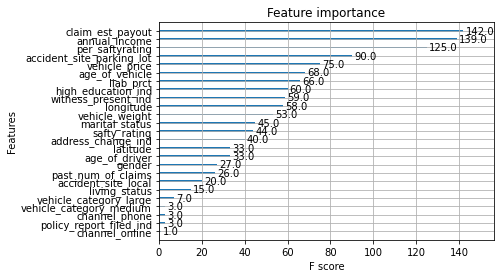

In [58]:
clf.fit(X, y)
plot_importance(clf)
pyplot.show()

In [3]:
# import LightGBM classifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')


In [62]:
# read full training data set
df_train = pd.read_csv("train_data_clean_5_grouped.csv")
gender_dummies = pd.get_dummies(df_train['gender'], 
                             prefix = 'gender', drop_first = True)
df_train = pd.concat([df_train, gender_dummies], axis = 1)
df_train.drop(["gender"], axis = 1, inplace = True)

living_status_dummies = pd.get_dummies(df_train['living_status'], 
                             prefix = 'living_status', drop_first = True)
df_train = pd.concat([df_train, living_status_dummies], axis = 1)
df_train.drop(["living_status"], axis = 1, inplace = True)

state_dummies = pd.get_dummies(df_train['state'], 
                               prefix = 'state', drop_first = True)
df_train = pd.concat([df_train, state_dummies], axis = 1)
df_train.drop(["state"], axis = 1, inplace = True)

df_train = df_train.sample(frac=1, random_state=5)
df_train['new_param'] = df_train.apply(lambda col: col['safty_rating']/(col['past_num_of_claims']+1), axis=1)
#df_train['prct_payout'] = df_train.apply(lambda col: col['claim_est_payout']/(col['annual_income']), axis=1)
#df_train['age_over_safety'] = df_train.apply(lambda col: col['age_of_driver']/(col['safty_rating']+1), axis=1)
df_train.set_index('claim_number', inplace=True)
df_train.sort_index(inplace=True)
df_train.drop(['claim_date','fraud_claim_date','fraud_zip_code',
        "fraud_gender", "fraud_marital_status", 'fraud_accident_site', 'fraud_high_education_ind',
         "fraud_address_change_ind", "fraud_living_status", "fraud_witness_present_ind", 
         "fraud_policy_report_filed_ind", "fraud_channel", "fraud_vehicle_category",
         'fraud_vehicle_color', 'fraud_state', 'SP_Index', 'Unem_rate'], axis = 1, inplace = True)
df_train = df_train.filter(regex="^(?!state_).*$")
df_train = df_train.filter(regex="^(?!vehicle_color_).*$")
df_train = df_train.filter(regex="^(?!claim_day_).*$")
df_train = df_train.filter(regex="^(?!claim_month_).*$")

train_lgb = df_train.copy()




In [64]:
# read full testing data set
df_test = pd.read_csv('test_data_clean_5_grouped.csv')
gender_dummies = pd.get_dummies(df_test['gender'], 
                             prefix = 'gender', drop_first = True)
df_test = pd.concat([df_test, gender_dummies], axis = 1)
df_test.drop(["gender"], axis = 1, inplace = True)

living_status_dummies = pd.get_dummies(df_test['living_status'], 
                             prefix = 'living_status', drop_first = True)
df_test = pd.concat([df_test, living_status_dummies], axis = 1)
df_test.drop(["living_status"], axis = 1, inplace = True)

state_dummies = pd.get_dummies(df_test['state'], 
                               prefix = 'state', drop_first = True)
df_test = pd.concat([df_test, state_dummies], axis = 1)
df_test.drop(["state"], axis = 1, inplace = True)

#df_test = df_test.sample(frac=1, random_state=5)
df_test['new_param'] = df_test.apply(lambda col: col['safty_rating']/(col['past_num_of_claims']+1), axis=1)
#df_test['prct_payout'] = df_test.apply(lambda col: col['claim_est_payout']/(col['annual_income']), axis=1)
#df_test['age_over_safety'] = df_test.apply(lambda col: col['age_of_driver']/(col['safty_rating']+1), axis=1)

df_test.set_index('claim_number', inplace=True)
df_test.sort_index(inplace=True)
df_test.drop(['claim_date','fraud_claim_date','fraud_zip_code',
        "fraud_gender", "fraud_marital_status", 'fraud_accident_site', 'fraud_high_education_ind',
         "fraud_address_change_ind", "fraud_living_status", "fraud_witness_present_ind", 
         "fraud_policy_report_filed_ind", "fraud_channel", "fraud_vehicle_category",
         'fraud_vehicle_color', 'fraud_state', 'SP_Index', 'Unem_rate'], axis = 1, inplace = True)
df_test = df_test.filter(regex="^(?!state_).*$")
df_test = df_test.filter(regex="^(?!vehicle_color_).*$")
df_test = df_test.filter(regex="^(?!claim_day_).*$")
df_test = df_test.filter(regex="^(?!claim_month_).*$")

test_lgb = df_test.copy()

In [68]:
# lgbm_params = {'boosting_type':'gbdt',  'objective':'binary', 'num_boost_round':800,
#                'feature_fraction': .321, 'bagging_fraction':0.50, 'min_child_samples':100,  
#                'min_child_weight':35, 'max_depth':3, 'num_leaves':2, 'learning_rate':0.15,
#                'reg_alpha':5, 'reg_lambda': 1.1, 'metric':'auc', 'max_bin': 52,
#                'colsample_bytree': 0.9, 'subsample': 0.8, 'is_unbalance': 'true'
# }

# y_train = train_lgb["fraud"]
# X_train = train_lgb.drop("fraud", 1)

# lgbm = LGBMClassifier(**lgbm_params)
# lgbm.fit(X_train.values, y_train.values)
# y_preds = lgbm.predict_proba(test_lgb.values)[:,1]

[LightGBM] [Warning] feature_fraction is set=0.321, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.321
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.8 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] num_iterations is set=800, num_boost_round=800 will be ignored. Current value: num_iterations=800


In [71]:
lgbm_params = {'boosting_type':'gbdt',  'objective':'binary', 
                'min_child_samples':100,  
               'min_child_weight':35, 'max_depth':3, 'num_leaves':2, 'learning_rate':0.15,
               'reg_alpha':5, 'reg_lambda': 1.1, 'metric':'f1', 'max_bin': 52,
               'colsample_bytree': 0.9, 'subsample': 0.8, 'is_unbalance': 'true'
}

y_train = train_lgb["fraud"]
X_train = train_lgb.drop("fraud", 1)

lgbm = LGBMClassifier(**lgbm_params)
lgbm.fit(X_train.values, y_train.values)
y_preds = lgbm.predict_proba(test_lgb.values)[:,1]


In [79]:
y_pred = lgbm.predict(test_lgb.values)[:,]
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [73]:
scores = model_selection.cross_val_score(lgbm, X_train.values, y_train.values, cv = 10, scoring = 'f1')
print(scores)
print("F1: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

[0.38350515 0.36758893 0.35968379 0.36176773 0.38170974 0.35440613
 0.39169139 0.35793731 0.37875752 0.38564103]
F1: 0.3723 (+/- 0.0128)


## output LightGBM

In [80]:
test_original = pd.read_csv("test_2021.csv")
test_output = {'claim_number':test_original['claim_number'], 'pred':y_pred}
test_output = pd.DataFrame(data = test_output)
test_output = test_output.set_index('claim_number')
test_output.to_csv("prediction_LGBM.csv")

# Model Comparison

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, VotingClassifier)
from mlxtend.classifier import StackingCVClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.axes as ax
from sklearn.naive_bayes import GaussianNB

In [67]:
# read full training data set
# df = pd.read_csv('train_data_clean_5_grouped.csv')

# gender_dummies = pd.get_dummies(df['gender'], 
#                              prefix = 'gender', drop_first = True)
# df = pd.concat([df, gender_dummies], axis = 1)
# df.drop(["gender"], axis = 1, inplace = True)

# living_status_dummies = pd.get_dummies(df['living_status'], 
#                              prefix = 'living_status', drop_first = True)
# df = pd.concat([df, living_status_dummies], axis = 1)
# df.drop(["living_status"], axis = 1, inplace = True)

# state_dummies = pd.get_dummies(df['state'], 
#                                prefix = 'state', drop_first = True)
# df = pd.concat([df, state_dummies], axis = 1)
# df.drop(["state"], axis = 1, inplace = True)

# df = df.sample(frac=1, random_state=5)
# df['new_param'] = df.apply(lambda col: col['safty_rating']/(col['past_num_of_claims']+1), axis=1)

# df.drop(['claim_number', 'claim_date','fraud_claim_date','fraud_zip_code',
#         "fraud_gender", "fraud_marital_status", 'fraud_accident_site', 'fraud_high_education_ind',
#          "fraud_address_change_ind", "fraud_living_status", "fraud_witness_present_ind", 
#          "fraud_policy_report_filed_ind", "fraud_channel", "fraud_vehicle_category",
#          'fraud_vehicle_color', 'fraud_state', 'SP_Index', 'Unem_rate'], axis = 1, inplace = True)
# df = df.filter(regex="^(?!state_).*$")
# df = df.filter(regex="^(?!vehicle_color_).*$")
# df = df.filter(regex="^(?!claim_day_).*$")
# df = df.filter(regex="^(?!claim_month_).*$")
df =pd.read_csv('train_final_for_xgb.csv')
# df['new_param'] = df.apply(lambda col: col['age_of_driver']/(col['annual_income']), axis=1)
X = df.drop(['fraud'], axis=1)
del X[X.columns[0]]
y = df['fraud']


In [68]:
X.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,latitude,longitude,accident_site_local,accident_site_parking_lot,channel_online,channel_phone,vehicle_category_large,vehicle_category_medium,per_saftyrating
0,46.0,1,1,85,38301.0,1,1,1,1,0,74,0,7530.940993,9.0,12885.45235,16161.33381,39.82,-105.10,1,0,0,0,0,0,42.5
1,21.0,0,0,75,30445.0,0,1,1,1,1,79,0,2966.024895,4.0,29429.45218,28691.96422,40.38,-80.39,0,0,1,0,1,0,37.5
2,49.0,0,0,87,38923.0,0,1,0,0,0,0,0,6283.888333,3.0,21701.18195,22090.94758,39.13,-77.66,1,0,0,0,0,0,87.0
3,58.0,0,1,58,40605.0,1,0,0,3,0,99,1,6169.747994,4.0,13198.27344,38329.58106,40.54,-79.80,1,0,0,0,0,1,14.5
4,38.0,1,1,95,36380.0,1,0,1,0,1,7,0,4541.387150,7.0,38060.21122,25876.56319,42.47,-93.64,0,0,0,0,0,1,95.0


In [69]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

X, y = smote.fit_resample(X, y)

In [70]:
y.value_counts().to_frame().T

,0,1
fraud,15179,15179


In [71]:
# AdaBoost parameters
ada_params = {
    'n_estimators': 116,
    'learning_rate': 0.1554
}

# Random Forest parameters
rf_params = {
    'n_estimators': 235,
    'max_depth': 84,
    'min_samples_leaf': 34,
    'max_features': 'sqrt'
}

# # Logistic Regression parameters
# lr_params = {
#     'penalty': 'l1'
# }

# XGBoost parameters
# xgb_params = {
#             "max_depth": 3, "learning_rate": 0.06, "n_estimators": 180, "objective": 'binary:logistic',
#             "gamma": 0.35, "min_child_weight": 5, "max_delta_step": 0,  "subsample": 0.8, "colsample_bytree": 0.785,
#             "colsample_bylevel": 1, "reg_alpha": 0.01, "reg_lambda": 1, "scale_pos_weight": 1, "seed": 1440, "missing": 2,
#  "eval_metric":"logloss"}


xgb_params = {"objective":'binary:logistic', 
                            "missing":-1, 
                            "seed":42, 
                            "gamma":0,
                            "learning_rate":0.05,
                            "reg_lambda":15,
                            "scale_pos_weight":1,
                            "max_depth":4,
                            "subsample":0.9,
                            "colsample_bytree":0.5,
                              "eval_metric":"logloss"}

# LightGBM parameters
lgmb_params = {'boosting_type':'gbdt',  'objective':'binary', 
                'min_child_samples':100,  
               'min_child_weight':35, 'max_depth':3, 'num_leaves':2, 'learning_rate':0.15,
               'reg_alpha':5, 'reg_lambda': 1.1, 'metric':'f1', 'max_bin': 52,
               'colsample_bytree': 0.9, 'subsample': 0.8, 'is_unbalance': 'true'
}

In [72]:
ada = AdaBoostClassifier(**ada_params)
rf = RandomForestClassifier(**rf_params)
xgb = XGBClassifier(**xgb_params)
lgbm = LGBMClassifier(**lgmb_params)
xgb_lgbm = VotingClassifier(estimators=list(zip(['xgb', 'lgbm'], [xgb, lgbm])), 
                          voting='soft', weights=[4, 6])
nb = GaussianNB()
models = [ada, rf, xgb, lgbm, xgb_lgbm,nb]
long_labels = ['Adaboost', 'Random Forest', 'XGBoost', 'LightGBM', 'XGBoost_LightGBM','Naive_Bayes']
F1=[]
print('5-fold cross validation:\n')
for clf, label in zip(models, long_labels):
    scores = model_selection.cross_val_score(clf, X.values, y.values, cv = 5, scoring = 'f1')
    print("F1: %0.9f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))
    F1.append([label,scores.mean(), scores.std()])

5-fold cross validation:

F1: 0.794204327 (+/- 0.2104) [Adaboost]
F1: 0.801945107 (+/- 0.2178) [Random Forest]
F1: 0.809193374 (+/- 0.2476) [XGBoost]
F1: 0.792529319 (+/- 0.2021) [LightGBM]
F1: 0.805181980 (+/- 0.2225) [XGBoost_LightGBM]
F1: 0.786060532 (+/- 0.1232) [Naive_Bayes]


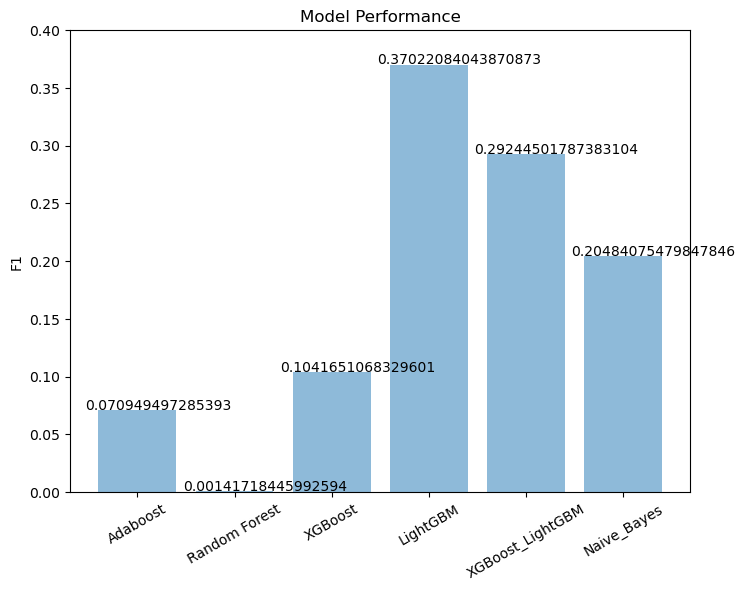

In [15]:
objects = ('Adaboost', 'Random Forest', 
           'XGBoost', 'LightGBM', 'XGBoost_LightGBM','Naive_Bayes')
y_pos = np.arange(len(objects))
performance = [i[1] for i in F1]

plt.figure(figsize=(8, 6))
plt.ylim(0, 0.4)
rects = plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation=30)
plt.ylabel('F1')
plt.title('Model Performance')


def autolabel(rects):
    for rect, perf in zip(rects, performance):
        height = rect.get_height()
        plt.text(rect.get_x() - rect.get_width()/6, 1.001*perf, '%s' % float(perf))
autolabel(rects)

plt.show()

# classification

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from skopt import BayesSearchCV
from matplotlib import pyplot
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, VotingClassifier)
from mlxtend.classifier import StackingCVClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.axes as ax
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn import model_selection
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from random import sample
import random
from statistics import mean

In [2]:
from sklearn.preprocessing import StandardScaler


In [3]:
train =pd.read_csv('train_final_for_xgb.csv')
train['new_param'] = train.apply(lambda col: col['age_of_driver']/(col['annual_income']), axis=1)
# train = train.drop(['fraud'], axis=1)
del train[train.columns[0]]
train_xgb = train.copy()
# train = StandardScaler().fit_transform(train)


In [43]:
train.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud,latitude,longitude,accident_site_local,accident_site_parking_lot,channel_online,channel_phone,vehicle_category_large,vehicle_category_medium,per_saftyrating,new_param
0,46.0,1,1,85,38301.0,1,1,1,1,0,74,0,7530.940993,9.0,12885.45235,16161.33381,0,39.82,-105.10,1,0,0,0,0,0,42.5,0.001201
1,21.0,0,0,75,30445.0,0,1,1,1,1,79,0,2966.024895,4.0,29429.45218,28691.96422,0,40.38,-80.39,0,0,1,0,1,0,37.5,0.000690
2,49.0,0,0,87,38923.0,0,1,0,0,0,0,0,6283.888333,3.0,21701.18195,22090.94758,1,39.13,-77.66,1,0,0,0,0,0,87.0,0.001259
3,58.0,0,1,58,40605.0,1,0,0,3,0,99,1,6169.747994,4.0,13198.27344,38329.58106,1,40.54,-79.80,1,0,0,0,0,1,14.5,0.001428
4,38.0,1,1,95,36380.0,1,0,1,0,1,7,0,4541.387150,7.0,38060.21122,25876.56319,0,42.47,-93.64,0,0,0,0,0,1,95.0,0.001045


In [4]:
test =pd.read_csv('test_final_for_xgb.csv')
test['new_param'] = test.apply(lambda col: col['age_of_driver']/(col['annual_income']), axis=1)
del test[test.columns[0]]
test_xgb = test.copy()

In [6]:
train_lgb = train.copy()
test_lgb = test.copy()

In [32]:
# xgb_params = {"objective":'binary:logistic', 
#                             "missing":-1, 
#                             "seed":42, 
#                             "gamma":0,
#                             "learning_rate":0.05,
#                             "reg_lambda":15,
#                             "scale_pos_weight":1,
#                             "max_depth":4,
#                             "subsample":0.9,
#                             "colsample_bytree":0.5,
#                               "eval_metric":"logloss"}

xgb_params = {
            "max_depth": 3, "learning_rate": 0.06, "n_estimators": 180, "objective": 'binary:logistic',
            "gamma": 0.35, "min_child_weight": 5, "max_delta_step": 0,  "subsample": 0.8, "colsample_bytree": 0.785,
            "colsample_bylevel": 1, "reg_alpha": 0.01, "reg_lambda": 1, "scale_pos_weight": 1, "seed": 1440, "missing": 2,
 "eval_metric":"logloss"}



lgbm_params = {'boosting_type':'gbdt',  'objective':'binary', 'num_iterations':800,
                 'min_child_samples':100,  
               'min_child_weight':35, 'max_depth':3, 'num_leaves':2, 'learning_rate':0.15,
               'reg_alpha':5, 'reg_lambda': 1.1, 'metric':'auc', 'max_bin': 52,
               'colsample_bytree': 0.9, 'subsample': 0.8, 'is_unbalance': 'true'
}



In [44]:
### Set the cost for misclassification
cost_dict = {0: 0, 1: 1, -1: 5}

### Set the seed list for splitting dataset
seed_list = [100, 150, 200, 250, 300, 350]

### Set the parameters of XGBoost and LightGBM
# clf = xgb.XGBClassifier(max_depth=3,
#             learning_rate=0.06,
#             n_estimators=180,
#             silent=True,
#             objective='binary:logistic',
#             gamma=0.35,
#             min_child_weight=5,
#             max_delta_step=0,
#             subsample=0.8,
#             colsample_bytree=0.785,
#             colsample_bylevel=1,
#             reg_alpha=0.01,
#             reg_lambda=1,
#             scale_pos_weight=1,
#             seed=1440,
#             missing=-1)
cost_list = []
thre_list = np.linspace(0.1,0.5,400)  ## to try diffrent range, just modify this code
for threshold in thre_list:
    cost = []
    for seed in seed_list:
        ## generate row indexes
        random.seed(seed)
        rindex =  np.array(sample(range(len(train_xgb)), round(0.7 * len(train_xgb))))

        ## Split train dataset into training and validation parts
        ## train_xgb and test_xgb are for XGBoost, train_lgb and test_lgb are for LightGBM

        training_xgb = train_xgb.iloc[rindex, :]
        validation_xgb = train_xgb.drop(train_xgb.index[rindex])

        training_lgb = train_lgb.iloc[rindex, :]
        validation_lgb = train_lgb.drop(train_lgb.index[rindex])


        ### XGBoost
        y_training_xgb = training_xgb["fraud"]
        X_training_xgb = training_xgb.drop("fraud", 1)
        y_validation_xgb = validation_xgb["fraud"]
        X_validation_xgb = validation_xgb.drop("fraud", 1)
        
        xgb = XGBClassifier(**xgb_params)
        xgb.fit(X_training_xgb, y_training_xgb)
        y_validation_prob_xgb = xgb.predict_proba(X_validation_xgb)[:,1]


        ### LightGBM
        y_training_lgb = training_lgb["fraud"]
        X_training_lgb = training_lgb.drop("fraud", 1)
        y_validation_lgb = validation_lgb["fraud"]
        X_validation_lgb = validation_lgb.drop("fraud", 1)


        lgbm = LGBMClassifier(**lgbm_params)
        lgbm.fit(X_training_lgb.values, y_training_lgb.values)
        y_validation_prob_lgb = lgbm.predict_proba(X_validation_lgb.values)[:,1]

        ### Combine the result of two models
        validation_prob = 0.4 * y_validation_prob_xgb + 0.6 * y_validation_prob_lgb

        ### Calculate the cost
        validation_pred = (validation_prob > threshold)*1  # a trick to transform boolean into int type
        cost.append(sum([cost_dict[i] for i in (validation_pred - y_validation_xgb)]))
        
    cost_list.append(mean(cost))

In [45]:

min_index = cost_list.index(min(cost_list))
print(thre_list[min_index])
print(cost_list[min_index])

0.3766917293233083
2940.3333333333335


In [16]:
y_train = train_lgb["fraud"]
X_train = train_lgb.drop("fraud", 1)
lgbm = LGBMClassifier(**lgbm_params)
lgbm.fit(X_train.values, y_train.values)
y_preds = lgbm.predict_proba(test_lgb.values)[:,1]

In [17]:
test_lgb['fraud'] = y_preds
results = test_lgb.filter(['fraud'], axis=1)
test_pred = pd.read_csv('test_2021.csv')
test_output = {'claim_number':test_pred['claim_number'], 'fraud':y_preds}
test_output = pd.DataFrame(data = test_output)
test_output = test_output.set_index('claim_number')
test_output.to_csv("prediction_lightgbm.csv")

In [47]:
xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train.values, y_train.values)
y_pred = xgb.predict_proba(test)[:,1]
test_pred = pd.read_csv('test_2021.csv')
test_output = {'claim_number':test_pred['claim_number'], 'fraud':y_pred}
test_output = pd.DataFrame(data = test_output)
test_output = test_output.set_index('claim_number')
test_output.to_csv("prediction_xgboost.csv")

In [48]:
lgb_pred = pd.read_csv('prediction_lightgbm.csv')
xgb_pred = pd.read_csv('prediction_xgboost.csv')
com_pred = pd.merge(lgb_pred, xgb_pred, on = "claim_number", how = "left")
com_pred['fraud'] = 0.6 * com_pred['fraud_x'] + 0.4 * com_pred['fraud_y']
com_pred.drop(['fraud_x', 'fraud_y'], axis = 1, inplace = True)
com_pred = com_pred.set_index('claim_number')
com_pred.to_csv('combined_predictions.csv')

In [53]:
### Predict on the test dataset
cost_dict = {0: 0, 1: 1, -1: 5}
test_pred = pd.read_csv('combined_predictions.csv')



test_pred['pred'] = (test_pred['fraud'] > 0.377)*1
test_pred = test_pred.set_index('claim_number')
test_pred.drop(['fraud'],axis=1,inplace=True)
test_pred.to_csv('fraud_classification.csv')



In [23]:
test_pred['pred'].value_counts().to_frame().T

,0,1
pred,7271,4731


In [60]:
4707/(4704+7295)

0.3922826902241853